# Golden Data Overview Revised

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import datetime as dt

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', 1500)

In [5]:
data = pd.read_csv('golden_dataset_revised.csv')
print(data.shape)
data.head(3)

(1456, 32)


date published_time            post_created_time produced_by  \
0  2019-05-15        06:30:15  2019-05-15 06:30:1557901800          DB   
1  2019-11-14        15:05:15  2019-11-14 15:05:1573743900          SK   
2  2020-01-09        08:47:15  2020-01-09 08:47:1578559673          SP   

                                       permalink_url  \
0  https://www.facebook.com/1954072204870360/post...   
1  https://www.facebook.com/1954072204870360/post...   
2  https://www.facebook.com/1954072204870360/post...   

                                               title  \
0                       'Kamali' Selected For Oscars   
1                   What Is Sabarimala Temple Issue?   
2  India's External Affairs Minister S Jaishankar...   

                                             message primary_category_l0  \
0  9 साल की Kamali Moorthy पर बनी short film हुई ...               Filmy   
1  क्यों है सबरीमाला मंदिर में महिलाओं के प्रवेश ...            Dharohar   
2  विदेश में देश का नाम बढ़ाने वाले एस जयशंकर का ...            Politics   

  primary_category (Undefined)Suggestion for Change in Primary  \
0           Filmy*                                         NaN   
1        Dharohar*                                         NaN   
2        Politics*                                         NaN   

  Primary Category  Suggestion Explaination Primary_Category_1  \
0                                       NaN      Entertainment   
1                                       NaN  Judiciary & Crime   
2                                       NaN           Politics   

  Secondary Category Secondary Category Suggestion 3 or less and comma sep  \
0             People                                                NaN      
1            Culture                           Court ruling / Decisions      
2             People                                                NaN      

  Secondary Category Suggestion Explaination  \
0                                        NaN   
1                                        NaN   
2                                        NaN   

                          Secondary_Category_1  \
0  Award/Achievement, X-Factor, Skate Boarding   
1                Court Ruling, Religious Place   
2              Anniversary, Famous Personality   

              Secondary_Category_1_revisited     video_type  \
0  Award/Achievement, X-Factor, Other Sports      Inspiring   
1                         Judicial, Religion  Controversial   
2                         Famous Personality   Day-specific   

  video_type suggestion           Video_Type_1  \
0                   NaN              Inspiring   
1                   NaN          Controversial   
2                   NaN  Day-specific, Profile   

                voice_first_3_seconds   visual_first_3_seconds  \
0                      text only (to)            commoner (np)   
1                 common voice (optv)            commoner (np)   
2   voice of famous personality (fpv)  famous personality (fp)   

  visual_first_3_seconds_Other background_music_type_first_3_seconds  \
0                          NaN                              relevant   
1                          NaN                              no music   
2                          NaN                              no music   

  Background Music In Beginning  Video Format   Video Length  \
0                            Yes        square           NaN   
1                             No        square           NaN   
2                             No        square           NaN   

            thumbnail thumbnail_Sentiment thumbnail_famous_personality_name  \
0            Commoner       Happy, Action                               NaN   
1              Temple            Neutral                                NaN   
2  Famous Personality              Happy                       s jaishankar   

  thumbnail_famous_personality_profession  \
0                                     NaN   
1                                     NaN   
2   

In [6]:
data.thumbnail.unique()

array(['Commoner', 'Temple', 'Famous Personality', 'Animal', 'Other',
       'Heritage', 'Object', 'Crowd', 'Nature, Animal',
       'Building/ Factory', 'Nature', 'Nature, Commoner',
       'Object, Commoner', 'Commoner, Animal', nan, 'Nature, Commoner ',
       'Commoner, Bird'], dtype=object)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 32 columns):
date                                                     1456 non-null object
published_time                                           1456 non-null object
post_created_time                                        1456 non-null object
produced_by                                              1385 non-null object
permalink_url                                            1456 non-null object
title                                                    1456 non-null object
message                                                  1456 non-null object
primary_category_l0                                      1456 non-null object
primary_category                                         1453 non-null object
(Undefined)Suggestion for Change in Primary              6 non-null object
Primary Category  Suggestion Explaination                12 non-null object
Primary_Category_1                      

###### Post created time is not in the correct data type format

In [7]:
data['post_created_time'] = pd.to_datetime(data['post_created_time'])

ParserError: second must be in 0..59: 2019-05-15 06:30:1557901800

###### time is not in correct format. It should be hh:mm:ss to convert it to datetime dtype

In [8]:
for i in range(data.shape[0]):
     data['post_created_time'][i] = data['post_created_time'].iloc[i][:-8]

C:\Users\rakhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
data['post_created_time'].head(3)

0    2019-05-15 06:30:15
1    2019-11-14 15:05:15
2    2020-01-09 08:47:15
Name: post_created_time, dtype: object

In [10]:
data['post_created_time'] = pd.to_datetime(data['post_created_time'])

In [11]:
data['post_created_time'].dtype

dtype('<M8[ns]')

### check if data is missing

In [12]:
#current dataframe have some unnecessary columns like explainations for category values
#check missing data only for those which are important 
for i in ['primary_category_l0', 'primary_category', 'Primary_Category_1', 'Secondary Category',
        'Secondary_Category_1_revisited', 'video_type', 'Video_Type_1', 'voice_first_3_seconds', 'visual_first_3_seconds',
          'background_music_type_first_3_seconds', 'thumbnail', 'thumbnail_Sentiment', 'Tags']:    
    print(i, '-->', data[data[i].isnull()].index + 2) 
    # +2 because in the excel indexing starts from 1 where in python starts with 0 so +1 
    # and in excel indexing start with column names where python does not include columns in index so +1.
    # So in total we need to add +2 to match the rows

primary_category_l0 --> Int64Index([], dtype='int64')
primary_category --> Int64Index([209, 210, 1149], dtype='int64')
Primary_Category_1 --> Int64Index([209, 210, 473, 1149], dtype='int64')
Secondary Category --> Int64Index([209, 210, 473, 1149], dtype='int64')
Secondary_Category_1_revisited --> Int64Index([209, 210, 240, 473, 1149], dtype='int64')
video_type --> Int64Index([209, 210, 473, 1149], dtype='int64')
Video_Type_1 --> Int64Index([209, 210, 473, 1149], dtype='int64')
voice_first_3_seconds --> Int64Index([209, 210, 240, 473], dtype='int64')
visual_first_3_seconds --> Int64Index([209, 210, 240, 473], dtype='int64')
background_music_type_first_3_seconds --> Int64Index([209, 210, 240, 473], dtype='int64')
thumbnail --> Int64Index([209, 210, 240, 473], dtype='int64')
thumbnail_Sentiment --> Int64Index([209, 210, 240, 473], dtype='int64')
Tags --> Int64Index([], dtype='int64')


###### we did not fill the data for the rows 209, 210, 240, 473 and 1149 because they are redundant 

We can drop those rows

In [13]:
data.drop([207, 208, 238, 471, 1147], axis = 0, inplace=True)

### Drop the columns which are not useful

In [14]:
data.columns

Index(['date', 'published_time', 'post_created_time', 'produced_by',
       'permalink_url', 'title', 'message', 'primary_category_l0',
       'primary_category', '(Undefined)Suggestion for Change in Primary',
       'Primary Category  Suggestion Explaination', 'Primary_Category_1',
       'Secondary Category',
       'Secondary Category Suggestion 3 or less and comma sep',
       'Secondary Category Suggestion Explaination', 'Secondary_Category_1',
       'Secondary_Category_1_revisited', 'video_type', 'video_type suggestion',
       'Video_Type_1', 'voice_first_3_seconds', 'visual_first_3_seconds',
       'visual_first_3_seconds_Other', 'background_music_type_first_3_seconds',
       'Background Music In Beginning ', 'Video Format ', 'Video Length',
       'thumbnail', 'thumbnail_Sentiment', 'thumbnail_famous_personality_name',
       'thumbnail_famous_personality_profession', 'Tags'],
      dtype='object')

In [15]:
data_refined = data.drop(['date', 'published_time', 'produced_by', '(Undefined)Suggestion for Change in Primary',
           'Primary Category  Suggestion Explaination', 'Secondary_Category_1', 'Secondary Category Suggestion 3 or less and comma sep',
           'Secondary Category Suggestion Explaination', 'video_type suggestion', 'Background Music In Beginning ', 
           'Video Format ', 'Video Length', 'thumbnail_famous_personality_name',
           'visual_first_3_seconds_Other', 'thumbnail_famous_personality_profession'], axis = 1)

In [16]:
#check if there are any duplicated rows
data_refined[data_refined.duplicated()]

post_created_time                                      permalink_url  \
1436 2020-04-09 08:52:15  https://www.facebook.com/1954072204870360/vide...   
1437 2020-04-09 08:52:15  https://www.facebook.com/1954072204870360/vide...   

                                                  title  \
1436  Supreme Court Asks Centre To Carry Out COVID-1...   
1437  Supreme Court Asks Centre To Carry Out COVID-1...   

                                                message primary_category_l0  \
1436  फ्री में हों कोरोना वायरस के टेस्ट, जानें सरका...              Health   
1437  फ्री में हों कोरोना वायरस के टेस्ट, जानें सरका...              Health   

     primary_category Primary_Category_1 Secondary Category  \
1436       Government         Government             Health   
1437       Government         Government             Health   

              Secondary_Category_1_revisited video_type  \
1436  Health, Judicial, Policies/Norms/Rules   Trending   
1437  Health, Judicial, Policies/Norms/Rules   Trending   

               Video_Type_1 voice_first_3_seconds visual_first_3_seconds  \
1436  Trending, Informative        text only (to)                  other   
1437  Trending, Informative        text only (to)                  other   

     background_music_type_first_3_seconds thumbnail thumbnail_Sentiment  \
1436                                   low    Object              Action   
1437                                   low    Object              Action   

                                                   Tags  
1436  Corona virus, test, medicine, Supreme court, C...  
1437  Corona virus, test, medicine, Supreme court, C...

row 1436 and 1437 are duplicated so we need to keep only one of those

In [17]:
data_refined.drop_duplicates(keep = 'first', inplace=True)

In [18]:
data_refined.reset_index(drop = True, inplace = True)

In [19]:
print(data_refined.shape)
data_refined.head(3)

(1449, 17)


post_created_time                                      permalink_url  \
0 2019-05-15 06:30:15  https://www.facebook.com/1954072204870360/post...   
1 2019-11-14 15:05:15  https://www.facebook.com/1954072204870360/post...   
2 2020-01-09 08:47:15  https://www.facebook.com/1954072204870360/post...   

                                               title  \
0                       'Kamali' Selected For Oscars   
1                   What Is Sabarimala Temple Issue?   
2  India's External Affairs Minister S Jaishankar...   

                                             message primary_category_l0  \
0  9 साल की Kamali Moorthy पर बनी short film हुई ...               Filmy   
1  क्यों है सबरीमाला मंदिर में महिलाओं के प्रवेश ...            Dharohar   
2  विदेश में देश का नाम बढ़ाने वाले एस जयशंकर का ...            Politics   

  primary_category Primary_Category_1 Secondary Category  \
0           Filmy*      Entertainment             People   
1        Dharohar*  Judiciary & Crime            Culture   
2        Politics*           Politics             People   

              Secondary_Category_1_revisited     video_type  \
0  Award/Achievement, X-Factor, Other Sports      Inspiring   
1                         Judicial, Religion  Controversial   
2                         Famous Personality   Day-specific   

            Video_Type_1               voice_first_3_seconds  \
0              Inspiring                      text only (to)   
1          Controversial                 common voice (optv)   
2  Day-specific, Profile   voice of famous personality (fpv)   

    visual_first_3_seconds background_music_type_first_3_seconds  \
0            commoner (np)                              relevant   
1            commoner (np)                              no music   
2  famous personality (fp)                              no music   

            thumbnail thumbnail_Sentiment  \
0            Commoner       Happy, Action   
1              Temple            Neutral    
2  Famous Personality              Happy    

                                                Tags  
0                                            no tags  
1  Sabarimala Temple, Sabarimala, Supreme Court, ...  
2  S Jaishankar, Jaishankar on JNU, Jaishankar ag...

In [20]:
data_refined.columns

Index(['post_created_time', 'permalink_url', 'title', 'message',
       'primary_category_l0', 'primary_category', 'Primary_Category_1',
       'Secondary Category', 'Secondary_Category_1_revisited', 'video_type',
       'Video_Type_1', 'voice_first_3_seconds', 'visual_first_3_seconds',
       'background_music_type_first_3_seconds', 'thumbnail',
       'thumbnail_Sentiment', 'Tags'],
      dtype='object')

In [21]:
#check unique values for each feature/column
features = []
unique_columns = []
for i in data_refined.columns:
    features.append(i)
    unique_columns.append(data_refined[i].nunique())
    
feature_unique_values = pd.DataFrame({'Feature': features, 'Unique Values': unique_columns}).sort_values(by = 'Unique Values')    
print(feature_unique_values)

                                  Feature  Unique Values
12                 visual_first_3_seconds              4
13  background_music_type_first_3_seconds              5
11                  voice_first_3_seconds              6
9                              video_type             14
14                              thumbnail             16
6                      Primary_Category_1             16
15                    thumbnail_Sentiment             17
5                        primary_category             28
7                      Secondary Category             33
4                     primary_category_l0             37
10                           Video_Type_1            109
8          Secondary_Category_1_revisited            585
16                                   Tags            750
2                                   title           1435
0                       post_created_time           1448
1                           permalink_url           1449
3                              

In [22]:
#feature_unique_values.plot(kind = 'bar', x = 'Feature', figsize = (10,5));

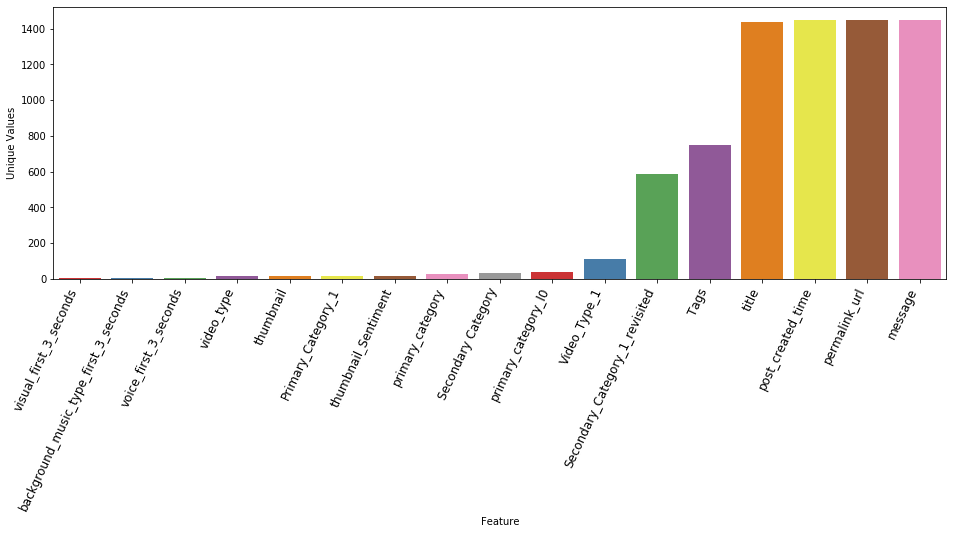

In [23]:
plt.figure(figsize=(16,5))
chart = sns.barplot(x = feature_unique_values['Feature'], y = feature_unique_values['Unique Values'], palette='Set1');
chart.set_xticklabels(chart.get_xticklabels(), rotation=65, horizontalalignment='right', fontweight='light',fontsize='large');

* It is obious to have unique permalink_url, message, post_created_time and title

* But the Secondary_Category_1, Tags should be less. In Secondary_Category_1, we can have combination of 3 (max) and that is why we got these many Secondary_Category_1 values. We need to format them to get right number of values.

## Features/Columns

In [24]:
data_refined.head(2)

post_created_time                                      permalink_url  \
0 2019-05-15 06:30:15  https://www.facebook.com/1954072204870360/post...   
1 2019-11-14 15:05:15  https://www.facebook.com/1954072204870360/post...   

                              title  \
0      'Kamali' Selected For Oscars   
1  What Is Sabarimala Temple Issue?   

                                             message primary_category_l0  \
0  9 साल की Kamali Moorthy पर बनी short film हुई ...               Filmy   
1  क्यों है सबरीमाला मंदिर में महिलाओं के प्रवेश ...            Dharohar   

  primary_category Primary_Category_1 Secondary Category  \
0           Filmy*      Entertainment             People   
1        Dharohar*  Judiciary & Crime            Culture   

              Secondary_Category_1_revisited     video_type   Video_Type_1  \
0  Award/Achievement, X-Factor, Other Sports      Inspiring      Inspiring   
1                         Judicial, Religion  Controversial  Controversial   

  voice_first_3_seconds visual_first_3_seconds  \
0        text only (to)          commoner (np)   
1   common voice (optv)          commoner (np)   

  background_music_type_first_3_seconds thumbnail thumbnail_Sentiment  \
0                              relevant  Commoner       Happy, Action   
1                              no music    Temple            Neutral    

                                                Tags  
0                                            no tags  
1  Sabarimala Temple, Sabarimala, Supreme Court, ...

### post_created_time

In [25]:
for i in range(data_refined.shape[0]):
    data_refined['post_created_time'].iloc[i] = data_refined['post_created_time'].iloc[i] + pd.DateOffset(hours= 5.50)

C:\Users\rakhi\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [26]:
data_refined['date'] = data_refined['post_created_time'].dt.day

In [27]:
data_refined['month'] = data_refined['post_created_time'].dt.month

In [28]:
data_refined['year'] = data_refined['post_created_time'].dt.year

In [29]:
data_refined['day'] = data_refined['post_created_time'].dt.weekday_name

In [30]:
data_refined['week_of_year'] = data_refined['post_created_time'].dt.week

In [31]:
data_refined['quarter'] = data_refined['post_created_time'].dt.quarter

In [32]:
week_of_month = []
for i in data_refined['date']:
    if i<= 7:
        week_of_month.append('first')
    elif i<=14:
        week_of_month.append('second')
    elif i<=21:
        week_of_month.append('third')
    else:
        week_of_month.append('fourth')
        
data_refined['week_of_month'] = week_of_month   

In [33]:
data_refined.head(2)

post_created_time                                      permalink_url  \
0 2019-05-15 12:00:15  https://www.facebook.com/1954072204870360/post...   
1 2019-11-14 20:35:15  https://www.facebook.com/1954072204870360/post...   

                              title  \
0      'Kamali' Selected For Oscars   
1  What Is Sabarimala Temple Issue?   

                                             message primary_category_l0  \
0  9 साल की Kamali Moorthy पर बनी short film हुई ...               Filmy   
1  क्यों है सबरीमाला मंदिर में महिलाओं के प्रवेश ...            Dharohar   

  primary_category Primary_Category_1 Secondary Category  \
0           Filmy*      Entertainment             People   
1        Dharohar*  Judiciary & Crime            Culture   

              Secondary_Category_1_revisited     video_type   Video_Type_1  \
0  Award/Achievement, X-Factor, Other Sports      Inspiring      Inspiring   
1                         Judicial, Religion  Controversial  Controversial   

  voice_first_3_seconds visual_first_3_seconds  \
0        text only (to)          commoner (np)   
1   common voice (optv)          commoner (np)   

  background_music_type_first_3_seconds thumbnail thumbnail_Sentiment  \
0                              relevant  Commoner       Happy, Action   
1                              no music    Temple            Neutral    

                                                Tags  date  month  year  \
0                                            no tags    15      5  2019   
1  Sabarimala Temple, Sabarimala, Supreme Court, ...    14     11  2019   

         day  week_of_year  quarter week_of_month  
0  Wednesday            20        2         third  
1   Thursday            46        4        second

In [34]:
data_refined['post_created_time'].min(), data_refined['post_created_time'].max()

(Timestamp('2019-05-15 12:00:15'), Timestamp('2020-04-16 18:15:15'))

In [35]:
data_refined['year'].value_counts()

2019    1351
2020      98
Name: year, dtype: int64

In [36]:
#data_refined['year'].value_counts().plot.bar();

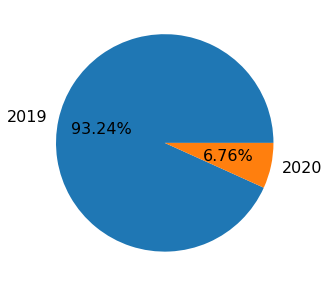

In [37]:
data_refined['year'].value_counts().plot(kind = 'pie', figsize = (5,5), fontsize = 16, autopct = '%.2f%%', label = '');

### permalink_url, title, message

In [38]:
data_refined.shape[0]

1449

In [39]:
data_refined[['permalink_url', 'title', 'message']].nunique()

permalink_url    1449
title            1435
message          1449
dtype: int64

In [40]:
#data_refined[data_refined['title'].duplicated(keep = False)]['title'].value_counts()[::][0]

Thirteen videos has same title

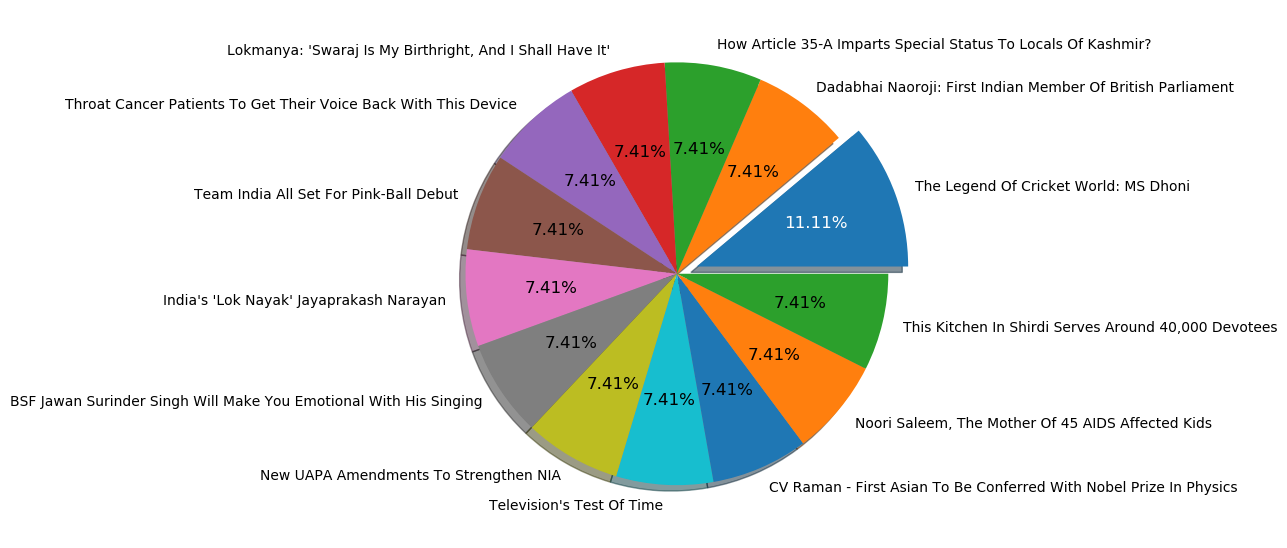

In [41]:
fig, ax = plt.subplots(figsize = (7,7), dpi = 100)
explode = (0.1,0,0,0,0,0,0,0,0,0,0,0,0)
patches, texts, autotexts = ax.pie(data_refined[data_refined['title'].duplicated(keep = False)]['title'].value_counts(), labels = dict(data_refined[data_refined['title'].duplicated(keep = False)]['title'].value_counts()).keys(), shadow = True, startangle = 0, explode = explode, autopct = '%.2f%%');
plt.setp(autotexts, size = 12)
autotexts[0].set_color('white')
plt.show()

In [42]:
#data_refined[data_refined['title'].duplicated(keep = False)]['title'].value_counts().plot(kind = 'pie', figsize = (5,5),label = '')

###  Primary Category

##### We have three columns for the primary category. 
1. primary_category_l0: Old categorization
2. primary_category: Correction in old categorization
3. Primary_Category_1: New categorization

In [43]:
# Check distribution for old categorization 
primary_category_l0 = pd.DataFrame({'Occurrence': data_refined['primary_category_l0'].value_counts(),                                    
                                    'Percentage': round(data_refined['primary_category_l0'].value_counts()*100/data_refined.shape[0], 2)
                                   })
print(f'The number of categories in primary_category_l0 are {primary_category_l0.shape[0]}')
primary_category_l0

The number of categories in primary_category_l0 are 37


Occurrence  Percentage
X Do not use People                            157       10.84
Politics                                       152       10.49
Sports & Games                                 124        8.56
Science & Tech                                  78        5.38
Dharohar                                        75        5.18
Education                                       71        4.90
X Do not use Bollywood & Entertainment          70        4.83
Food                                            61        4.21
X Do not use Viral X                            61        4.21
Foreign Affairs                                 57        3.93
X Do not use Armed Forces                       56        3.86
X Do not use History                            53        3.66
Animals                                         51        3.52
Business & Money                                46        3.17
Crime                                           44        3.04
Environment                                     41        2.83
Travel                                          33        2.28
Lifestyle                                       26        1.79
X Do not use Shocking Visuals                   25        1.73
Art                                             23        1.59
Garv                                            17        1.17
Government                                      17        1.17
Health                                          15        1.04
Undefined                                       15        1.04
Social Work                                     12        0.83
Health & Fitness                                12        0.83
Inventions / Innovations                        11        0.76
Daily NEWJ                                       9        0.62
Filmy                                            8        0.55
Culture                                          8        0.55
Police-Army                                      6        0.41
X Do not use X Entertainment                     5        0.35
Economy                                          3        0.21
Police - Army                                    3        0.21
lifestyle                                        2        0.14
Inventions & Innovations                         1        0.07
Proud Stories/Garv                               1        0.07

In [44]:
# Check distribution for the correction of the old categorization
primary_category = pd.DataFrame({'Occurrence': data_refined['primary_category'].value_counts(),
                                'Percentage': round(data_refined['primary_category'].value_counts()*100/data_refined.shape[0], 2)})
print(f'The number of categories in the primary_category are {primary_category.shape[0]}')
primary_category

The number of categories in the primary_category are 28


Occurrence  Percentage
Politics*                        148       10.21
Sports & Games                   146       10.08
Government                        99        6.83
Dharohar*                         90        6.21
Foreign Affairs                   86        5.94
Filmy*                            85        5.87
Environment                       82        5.66
Science & Tech*                   78        5.38
Lifestyle                         77        5.31
Undefined                         77        5.31
Crime                             68        4.69
Police-Army                       63        4.35
Education                         50        3.45
Business & Money                  49        3.38
Art                               42        2.90
Social Work                       41        2.83
Travel                            41        2.83
Daily NEWJ*                       26        1.79
Health                            22        1.52
Animals                           17        1.17
Proud Stories/Garv*               17        1.17
Food                              12        0.83
Economy                           11        0.76
Culture                            9        0.62
Inventions / Innovations           8        0.55
Science & Tech                     3        0.21
Inventions & Innovations           1        0.07
Health & Fitness                   1        0.07

In [45]:
# Check distribution for the new categorization
Primary_Category_1 = pd.DataFrame({'Occurrence': data_refined['Primary_Category_1'].value_counts(),
                                   'Percentage': round(data_refined['Primary_Category_1'].value_counts()*100/data_refined.shape[0], 2)})
print(f'The number of categories in the Primary_Category_1 are {Primary_Category_1.shape[0]}')
Primary_Category_1

The number of categories in the Primary_Category_1 are 16


Occurrence  Percentage
Lifestyle                        200       13.80
Politics                         144        9.94
Sports & Games                   142        9.80
Government                       110        7.59
Global News                      107        7.38
Environment/Ecosystem             92        6.35
Technology & Innovations          89        6.14
Entertainment                     89        6.14
Judiciary & Crime                 85        5.87
Places                            76        5.24
Forces                            69        4.76
Business                          61        4.21
Others                            57        3.93
Education                         55        3.80
Skill & Art                       42        2.90
Weird News                        31        2.14

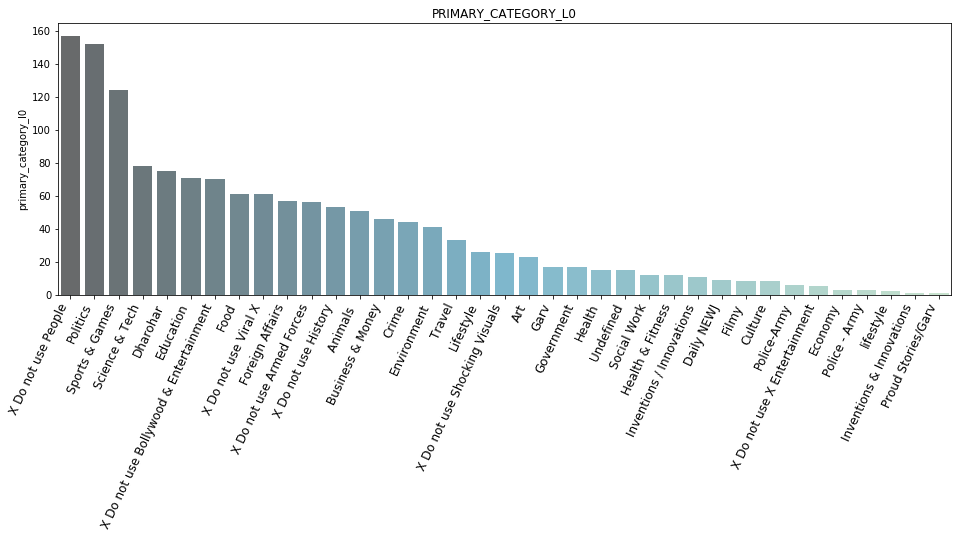

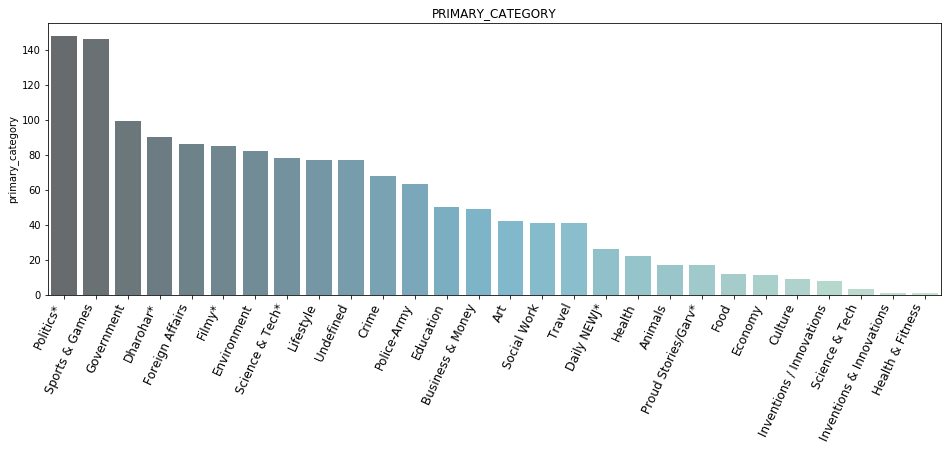

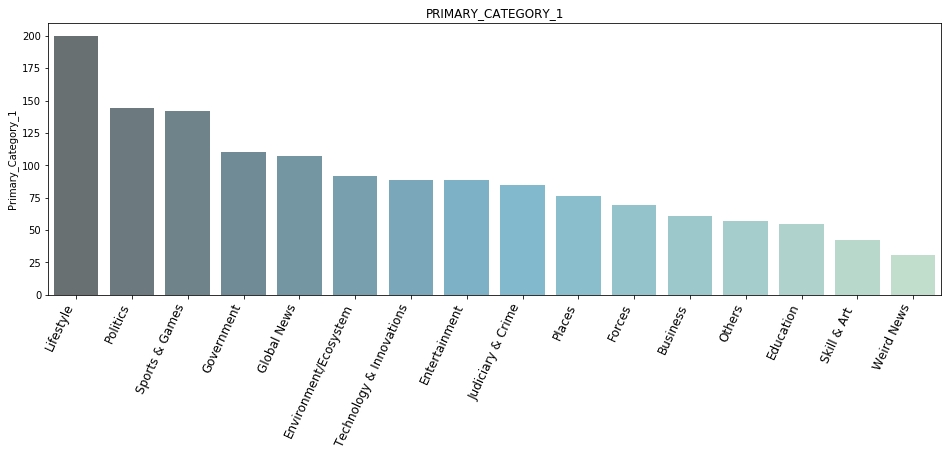

In [46]:
# Compare the distribution for all the columns of the primary category
for i in ['primary_category_l0', 'primary_category', 'Primary_Category_1']:
    plt.figure(figsize=(16,5))
    chart = sns.barplot(x = list(dict(data_refined[i].value_counts()).keys()), y = data_refined[i].value_counts(), palette="GnBu_d", alpha = 0.75)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=65, horizontalalignment='right', fontweight='light',fontsize='large');
    plt.title(i.upper())
    plt.show()

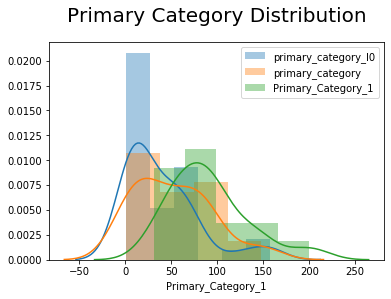

In [47]:
for i in ['primary_category_l0', 'primary_category', 'Primary_Category_1']:
    sns.distplot(data_refined[i].value_counts(), label=i);
    plt.title('Primary Category Distribution', fontdict= {'fontsize': 20}, pad = 20.5)
    plt.legend()

###### We can easily see through bar graph and distribution plot that new categorization (Primary_Category_1) has much better distribution where primary_category i.e. correction in the old categorization has better categorization compare to old categorization (primary_category_l0)

### Seconday Category

#### For secondary category we have two columns:
1. Secondary Category: As per old categorization
2. secondary_category_1: As per new categorization 

#### Secondary Category: Old categorization

In [48]:
# check the number of secondary categories as per old categorization 
data_refined['Secondary Category'].nunique()

33

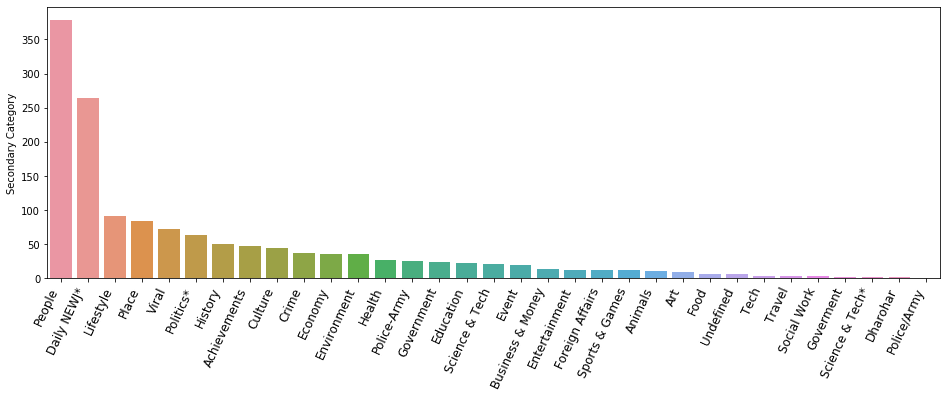

In [49]:
# check the distribution
plt.figure(figsize = (16,5))
chart = sns.barplot(x = list(dict(data_refined['Secondary Category'].value_counts()).keys()), y = data_refined['Secondary Category'].value_counts())
chart.set_xticklabels(chart.get_xticklabels(), rotation=65, horizontalalignment='right', fontweight='light',fontsize='large');

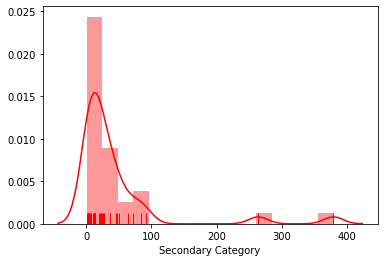

In [50]:
sns.distplot(data_refined['Secondary Category'].value_counts(), rug=True, color = 'r');

###### As we can see the distribution is very bad among all of the secondary categories as per old categorization 

#### Secondary_Category_1

In [51]:
data_refined['Secondary_Category_1_revisited'].dtype

dtype('O')

Secondary_Category_1_revisited is new categorization we did for the feature secondary category

In [52]:
#check unique values for Secondary_Category_1
data_refined['Secondary_Category_1_revisited'].nunique()

585

585 is big number of categories, it is because we can have three secondary categories seperated by comma. To see actual number of secondary categories we need to do some operations.

In [53]:
data_refined['Secondary_Category_1_revisited'] = data_refined['Secondary_Category_1_revisited'].astype('category')

In [54]:
#create three different columns for secondary category because we can have upto 3 secondary categories for a video.
secondary_category_1_1 = []
secondary_category_1_2 = []
secondary_category_1_3 = []
for i in range(data_refined.shape[0]):
    temp_list = str(data_refined['Secondary_Category_1_revisited'][i]).split(',')
    if len(temp_list) == 1:
        secondary_category_1_1.append(str(data_refined['Secondary_Category_1_revisited'][i]).split(',')[0].strip().lower())
        secondary_category_1_2.append('no_s_category')
        secondary_category_1_3.append('no_s_category')
    elif len(temp_list) == 2:
        secondary_category_1_1.append(str(data_refined['Secondary_Category_1_revisited'][i]).split(',')[0].strip().lower())
        secondary_category_1_2.append(str(data_refined['Secondary_Category_1_revisited'][i]).split(',')[1].strip().lower())
        secondary_category_1_3.append('no_s_category')
    else:
        secondary_category_1_1.append(str(data_refined['Secondary_Category_1_revisited'][i]).split(',')[0].strip().lower())
        secondary_category_1_2.append(str(data_refined['Secondary_Category_1_revisited'][i]).split(',')[1].strip().lower())
        secondary_category_1_3.append(str(data_refined['Secondary_Category_1_revisited'][i]).split(',')[2].strip().lower())
        
data_refined['secondary_category_1_1'] = secondary_category_1_1  
data_refined['secondary_category_1_2'] = secondary_category_1_2
data_refined['secondary_category_1_3'] = secondary_category_1_3

In [55]:
data_refined.head(2)

post_created_time                                      permalink_url  \
0 2019-05-15 12:00:15  https://www.facebook.com/1954072204870360/post...   
1 2019-11-14 20:35:15  https://www.facebook.com/1954072204870360/post...   

                              title  \
0      'Kamali' Selected For Oscars   
1  What Is Sabarimala Temple Issue?   

                                             message primary_category_l0  \
0  9 साल की Kamali Moorthy पर बनी short film हुई ...               Filmy   
1  क्यों है सबरीमाला मंदिर में महिलाओं के प्रवेश ...            Dharohar   

  primary_category Primary_Category_1 Secondary Category  \
0           Filmy*      Entertainment             People   
1        Dharohar*  Judiciary & Crime            Culture   

              Secondary_Category_1_revisited     video_type   Video_Type_1  \
0  Award/Achievement, X-Factor, Other Sports      Inspiring      Inspiring   
1                         Judicial, Religion  Controversial  Controversial   

  voice_first_3_seconds visual_first_3_seconds  \
0        text only (to)          commoner (np)   
1   common voice (optv)          commoner (np)   

  background_music_type_first_3_seconds thumbnail thumbnail_Sentiment  \
0                              relevant  Commoner       Happy, Action   
1                              no music    Temple            Neutral    

                                                Tags  date  month  year  \
0                                            no tags    15      5  2019   
1  Sabarimala Temple, Sabarimala, Supreme Court, ...    14     11  2019   

         day  week_of_year  quarter week_of_month secondary_category_1_1  \
0  Wednesday            20        2         third      award/achievement   
1   Thursday            46        4        second               judicial   

  secondary_category_1_2 secondary_category_1_3  
0               x-factor           other sports  
1               religion          no_s_category

In [56]:
#check how many unique values are there in 1, 2 and 3 secondary categories
len(set(secondary_category_1_1)), len(set(secondary_category_1_2)), len(set(secondary_category_1_3))

(46, 44, 37)

* In secondary_category_1_1 46 unique values are used 
* In secondary_category_1_2 43 unique values are used. (We have used no_s_category in the secondary_category_1_2, for those videos which has only one secondary category)
* In secondary_category_1_3 36 unique values are used. (We have used no_s_category in the secondary_category_1_3, for those videos which has only one or two secondary categories)

In [57]:
#check if there are mistakes in secondary categorization 
set(list(set(secondary_category_1_1))+list(set(secondary_category_1_2))+list(set(secondary_category_1_3)))

{'',
 'air force',
 'animals',
 'army',
 'award/achievement',
 'awareness',
 'bloopers',
 'bollywood',
 'bsf',
 'conservation',
 'cricket',
 'crime',
 'crisis',
 'crpf',
 'culture',
 'dance',
 'digital/tv',
 'economy/economic',
 'empowerment',
 'facts',
 'famous personality',
 'food',
 'football',
 'health',
 'history',
 'hockey',
 'internet sensation',
 'judicial',
 'lgbtq',
 'music',
 'navy',
 'news',
 'no_s_category',
 'other sports',
 'person specific',
 'police',
 'policies/norms/rules',
 'political',
 'protests/rallies',
 'religion',
 'science',
 'social work',
 'spiritual',
 'statement/speech',
 'tennis',
 'tourism',
 'visual arts',
 'x-factor'}

In [58]:
#check overall how many unique values has been used in the secondary category
len(list(set(secondary_category_1_1))+list(set(secondary_category_1_2))+list(set(secondary_category_1_3))), len(set(list(set(secondary_category_1_1))+list(set(secondary_category_1_2))+list(set(secondary_category_1_3))))

(127, 48)

* 48-2(no_s_category and blank) = 46 unique categories has been used for secondary category column which is a huge number by looking at the size of the data.


In [59]:
# Create dataframe to see percent wise distribution of secondary_category_1_1 
distribution_secondary_category_1_1 = pd.DataFrame({'Occurrence': data_refined['secondary_category_1_1'].value_counts(),
                                   'Percentage': round(data_refined['secondary_category_1_1'].value_counts()*100/data_refined.shape[0], 2)})
print(f'The number of categories in the secondary_category_1_1 are {distribution_secondary_category_1_1.shape[0]}')
distribution_secondary_category_1_1

The number of categories in the secondary_category_1_1 are 46


Occurrence  Percentage
famous personality           140        9.66
news                         109        7.52
religion                      82        5.66
cricket                       72        4.97
person specific               70        4.83
crime                         66        4.55
policies/norms/rules          57        3.93
social work                   54        3.73
health                        51        3.52
crisis                        50        3.45
history                       46        3.17
economy/economic              46        3.17
bollywood                     46        3.17
conservation                  42        2.90
other sports                  36        2.48
award/achievement             33        2.28
culture                       33        2.28
police                        30        2.07
army                          30        2.07
judicial                      30        2.07
facts                         28        1.93
animals                       25        1.73
food                          21        1.45
visual arts                   21        1.45
tourism                       21        1.45
science                       20        1.38
protests/rallies              18        1.24
empowerment                   17        1.17
statement/speech              16        1.10
political                     16        1.10
digital/tv                    14        0.97
air force                     14        0.97
awareness                     14        0.97
football                      12        0.83
x-factor                      11        0.76
internet sensation            10        0.69
dance                          9        0.62
music                          8        0.55
bloopers                       8        0.55
hockey                         5        0.35
lgbtq                          5        0.35
tennis                         4        0.28
spiritual                      3        0.21
bsf                            3        0.21
navy                           2        0.14
crpf                           1        0.07

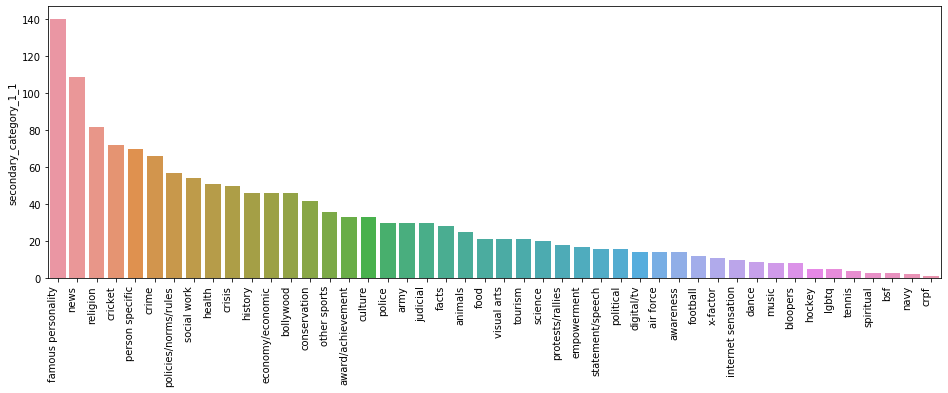

In [60]:
#check the distribution for secondary_category_1_1
plt.figure(figsize = (16,5))
chart = sns.barplot(x = list(dict(data_refined['secondary_category_1_1'].value_counts()[:75]).keys()), y = data_refined['secondary_category_1_1'].value_counts()[:75])
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90, horizontalalignment = 'right');

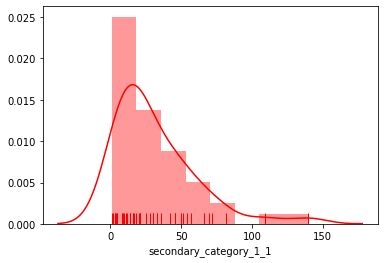

In [61]:
sns.distplot(data_refined['secondary_category_1_1'].value_counts(), rug= True, color = 'r');

###### we can see the distribution is better than the old secondary category distribution. 

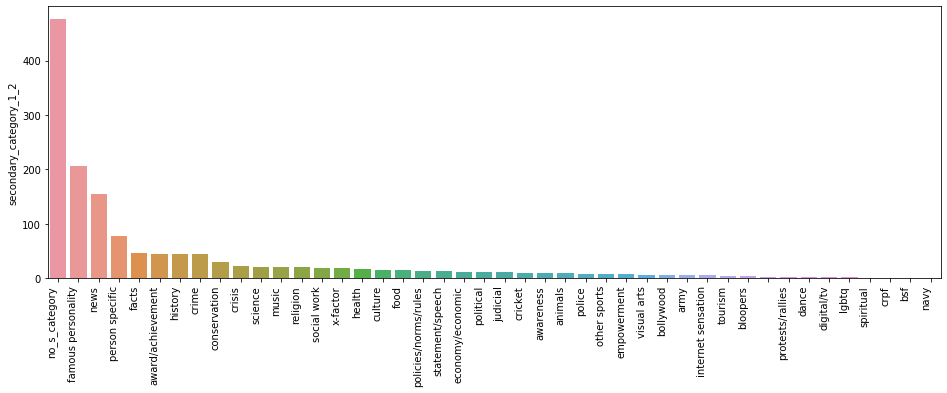

In [62]:
#check the distribution for secondary_category_1_2
plt.figure(figsize = (16,5))
chart = sns.barplot(x = list(dict(data_refined['secondary_category_1_2'].value_counts()[:75]).keys()), y = data_refined['secondary_category_1_2'].value_counts()[:75])
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90, horizontalalignment = 'right');

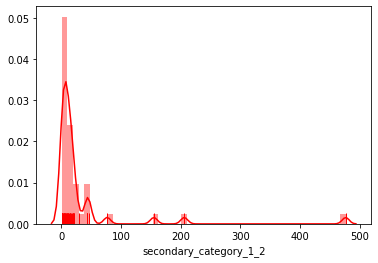

In [63]:
sns.distplot(data_refined['secondary_category_1_2'].value_counts(), rug= True, color = 'r');

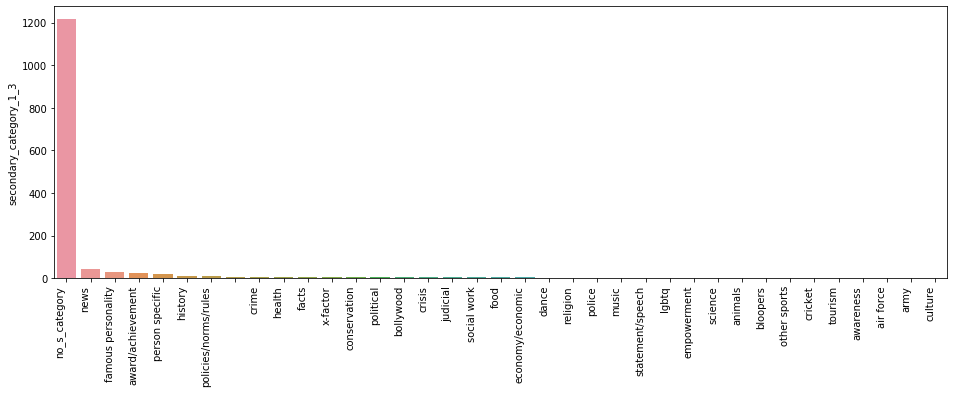

In [64]:
#check the distribution for secondary_category_1_3
plt.figure(figsize = (16,5))
chart = sns.barplot(x = list(dict(data_refined['secondary_category_1_3'].value_counts()[:75]).keys()), y = data_refined['secondary_category_1_3'].value_counts()[:75])
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90, horizontalalignment = 'right');

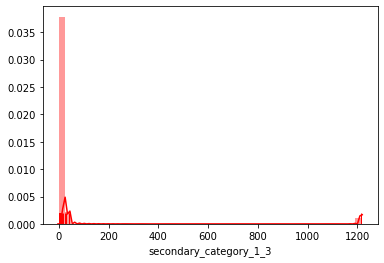

In [65]:
sns.distplot(data_refined['secondary_category_1_3'].value_counts(), rug= True, color = 'r');

In [66]:
set(data_refined['Secondary_Category_1_revisited'])

{' Award/Achievement',
 ' Conservation',
 ' Conservation, News',
 ' Crisis, Conservation',
 ' Crisis, facts',
 ' Famous Personality',
 ' Famous Personality, Science',
 ' History, Facts',
 ' History, Science',
 ' Judicial, History, Famous Personality,',
 ' News',
 ' News ',
 ' News, Facts',
 ' News, Science',
 ' Person Specific, Visual Arts',
 ' Policies/Norms/Rules',
 ' Policies/Norms/Rules, News',
 ' Religion, Famous Personality',
 ' Tourism, News',
 'Air Force',
 'Air Force, Crisis',
 'Air Force, Facts',
 'Air Force, Famous Personality',
 'Air Force, Famous Personality, Empowerment',
 'Air Force, Famous Personality, News',
 'Air Force, Health, Famous Personality',
 'Air Force, News',
 'Animals',
 'Animals , Famous Personality',
 'Animals, Conservation',
 'Animals, Conservation, News',
 'Animals, Facts',
 'Animals, News',
 'Animals, News, Air Force',
 'Animals, Person Specific',
 'Animals, Person Specific\n',
 'Animals, Social Work',
 'Animals, Visual Arts',
 'Animals, X-Factor',
 'An

In [67]:
secondary_revisited = []
for i in data_refined['Secondary_Category_1_revisited']:
    secondary_revisited.append(i.strip().lower())
len(set(secondary_revisited))    

540

In [69]:
set(data_refined['secondary_category_1_2']) - set(data_refined['secondary_category_1_1']).intersection(set(data_refined['secondary_category_1_2']))

{'', 'no_s_category'}

In [70]:
len(set(data_refined['secondary_category_1_2']))

44

In [71]:
len(set(data_refined['secondary_category_1_2'])) - len(list(set(data_refined['secondary_category_1_1']).intersection(set(data_refined['secondary_category_1_2']))))

2

###### There are total 2 unique categories used second list of secondary category from 1st list. Where one of them is blank and another is no_s_category means no different category which is good

In [72]:
set(data_refined['secondary_category_1_3']) - set(data_refined['secondary_category_1_1']).intersection(set(data_refined['secondary_category_1_3']))

{'', 'no_s_category'}

In [73]:
len(list(set(data_refined['secondary_category_1_3'])))

37

In [74]:
len(set(data_refined['secondary_category_1_3'])) - len(list(set(data_refined['secondary_category_1_1']).intersection(set(data_refined['secondary_category_1_3']))))

2

###### There are total 2 unique categories used in the third list of secondary category from 1st list. Where one of them is blank and another is no_s_category means no different category which is good


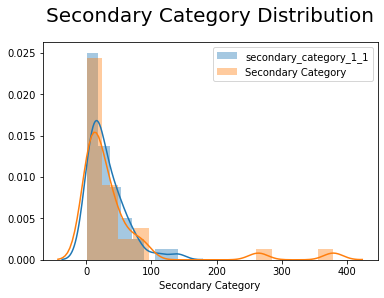

In [78]:
for i in ['secondary_category_1_1', 'Secondary Category']:
    sns.distplot(data_refined[i].value_counts(), label=i);
    plt.title('Secondary Category Distribution', fontdict= {'fontsize': 20}, pad = 20.5)
    plt.legend()

### Video Type

##### We have two columns for feature video type.
1. video_type: As per old categorization
2. Video_Type_1: As per new categorization

#### video_type

In [79]:
data_refined['video_type'].unique()

array(['Inspiring', 'Controversial', 'Day-specific', 'Funny',
       'Explainers', 'Informative', 'Entertaining', 'Trending', 'Profile',
       'Shocking/Surprising', 'Compilation', 'Emotional', 'Interview',
       'Self-help'], dtype=object)

In [80]:
data_refined['video_type'].nunique()

14

In [81]:
data_refined['video_type'].value_counts()

Informative            604
Shocking/Surprising    202
Inspiring              154
Day-specific           115
Explainers              82
Controversial           70
Profile                 61
Trending                54
Entertaining            49
Funny                   29
Compilation             15
Emotional               10
Self-help                2
Interview                2
Name: video_type, dtype: int64

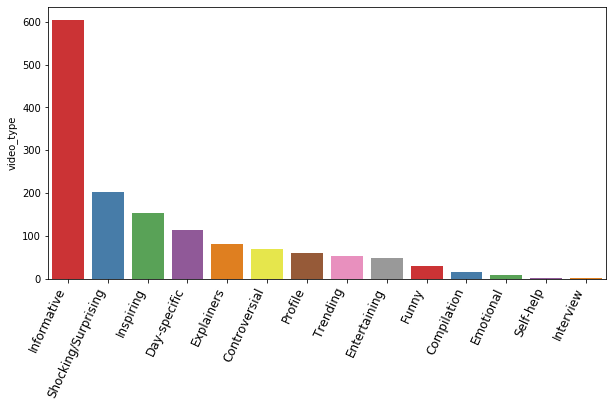

In [82]:
plt.figure(figsize = (10,5))
charts = sns.barplot(x = list(dict(data_refined['video_type'].value_counts()).keys()), y = data_refined['video_type'].value_counts(), palette = 'Set1')
charts.set_xticklabels(charts.get_xticklabels(), rotation = 65, horizontalalignment = 'right', fontweight = 'light', fontsize = 'large');

#### Video_Type_1

In [83]:
data_refined['Video_Type_1'].unique()

array(['Inspiring', 'Controversial', 'Day-specific, Profile',
       'Funny, Viral', 'Informative, Explainers',
       'Informative, Controversial', 'Informative', 'Entertaining, Viral',
       'Event, Inspiring', 'General, Profile',
       'Trending, Emotional, Scary', 'Trending, Controversial',
       'General ', 'Emotional, Scary', 'Trending', 'Trending, Inspiring',
       'General, Entertaining ', 'Controversial, Viral',
       'Shocking/Surprising', 'Inspiring, Informative', 'Profile',
       'Shocking/Surprising, Inspiring', 'Compilation, Emotional',
       'Compilation', 'Explainers', 'Funny, Inspiring', 'Day-specific',
       'Trending, Informative', 'Scary, Informative, Day-specific',
       'Profile, Shocking/Surprising', 'Informative, Trending',
       'Shocking/Surprising, Viral', 'Profile, Inspiring',
       'Funny, Compilation', 'Event', 'Controversial, Informative',
       'Shocking/Surprising, Informative', 'Viral, Controversial',
       'Profile, Informative', 'Compila

In [84]:
data_refined['Video_Type_1'].nunique()

109

There are 109 unique values for Video_Type_1 which is again a huge number to have for video type. But we have this number because we can have 2 video types for one video seperated by comma. SO to get acutal number we need to process our data for Video_Type_1

In [85]:
#create two different columns for Video_Type_1 because we can have upto 2 video types for a video.
Video_Type_1_1 = []
Video_Type_1_2 = []
for i in range(data_refined.shape[0]):
    temp_list = data_refined['Video_Type_1'][i].split(',')
    if len(temp_list) == 1:
        Video_Type_1_1.append(data_refined['Video_Type_1'][i].split(',')[0].strip().lower())
        Video_Type_1_2.append('no_v_category')
    else:
        Video_Type_1_1.append(data_refined['Video_Type_1'][i].split(',')[0].strip().lower())
        Video_Type_1_2.append(data_refined['Video_Type_1'][i].split(',')[1].strip().lower())
        
data_refined['Video_Type_1_1'] = Video_Type_1_1  
data_refined['Video_Type_1_2'] = Video_Type_1_2

In [86]:
data_refined.head(3)

post_created_time                                      permalink_url  \
0 2019-05-15 12:00:15  https://www.facebook.com/1954072204870360/post...   
1 2019-11-14 20:35:15  https://www.facebook.com/1954072204870360/post...   
2 2020-01-09 14:17:15  https://www.facebook.com/1954072204870360/post...   

                                               title  \
0                       'Kamali' Selected For Oscars   
1                   What Is Sabarimala Temple Issue?   
2  India's External Affairs Minister S Jaishankar...   

                                             message primary_category_l0  \
0  9 साल की Kamali Moorthy पर बनी short film हुई ...               Filmy   
1  क्यों है सबरीमाला मंदिर में महिलाओं के प्रवेश ...            Dharohar   
2  विदेश में देश का नाम बढ़ाने वाले एस जयशंकर का ...            Politics   

  primary_category Primary_Category_1 Secondary Category  \
0           Filmy*      Entertainment             People   
1        Dharohar*  Judiciary & Crime            Culture   
2        Politics*           Politics             People   

              Secondary_Category_1_revisited     video_type  \
0  Award/Achievement, X-Factor, Other Sports      Inspiring   
1                         Judicial, Religion  Controversial   
2                         Famous Personality   Day-specific   

            Video_Type_1               voice_first_3_seconds  \
0              Inspiring                      text only (to)   
1          Controversial                 common voice (optv)   
2  Day-specific, Profile   voice of famous personality (fpv)   

    visual_first_3_seconds background_music_type_first_3_seconds  \
0            commoner (np)                              relevant   
1            commoner (np)                              no music   
2  famous personality (fp)                              no music   

            thumbnail thumbnail_Sentiment  \
0            Commoner       Happy, Action   
1              Temple            Neutral    
2  Famous Personality              Happy    

                                                Tags  date  month  year  \
0                                            no tags    15      5  2019   
1  Sabarimala Temple, Sabarimala, Supreme Court, ...    14     11  2019   
2  S Jaishankar, Jaishankar on JNU, Jaishankar ag...     9      1  2020   

         day  week_of_year  quarter week_of_month secondary_category_1_1  \
0  Wednesday            20        2         third      award/achievement   
1   Thursday            46        4        second               judicial   
2   Thursday             2        1        second     famous personality   

  secondary_category_1_2 secondary_category_1_3 Video_Type_1_1 Video_Type_1_2  
0               x-factor           other sports      inspiring  no_v_category  
1               religion          no_s_category  controversial  no_v_category  
2          no_s_category          no_s_category   day-specific        profile

In [87]:
#check unique number of values for Video_Type_1_1 and Video_Type_1_2
data_refined['Video_Type_1_1'].nunique(), data_refined['Video_Type_1_2'].nunique()

(19, 19)

In [88]:
# check overall unique values for feature video type
len(set(list(data_refined['Video_Type_1_1'].unique()) + list(data_refined['Video_Type_1_2'].unique())))

21

###### There are total 21 - 1 (no_v_category) = 20 unique values for video type column as per new categorization

In [89]:
#check if there are mistakes in video type
set(list(data_refined['Video_Type_1_1'].unique()) + list(data_refined['Video_Type_1_2'].unique()))

{'anger',
 'compilation',
 'concerning',
 'controversial',
 'day-specific',
 'emotional',
 'entertaining',
 'event',
 'explainers',
 'funny',
 'general',
 'informative',
 'inspiring',
 'interview',
 'no_v_category',
 'profile',
 'scary',
 'self-help',
 'shocking/surprising',
 'trending',
 'viral'}

###### as we can see there are some spelling mistakes. By correctling these mistakes we will able to minimize the number of video type

#### Video_Type_1_1

In [90]:
#check unique values for Video_Type_1_1
data_refined['Video_Type_1_1'].unique()

array(['inspiring', 'controversial', 'day-specific', 'funny',
       'informative', 'entertaining', 'event', 'general', 'trending',
       'emotional', 'shocking/surprising', 'profile', 'compilation',
       'explainers', 'scary', 'viral', 'interview', 'concerning',
       'self-help'], dtype=object)

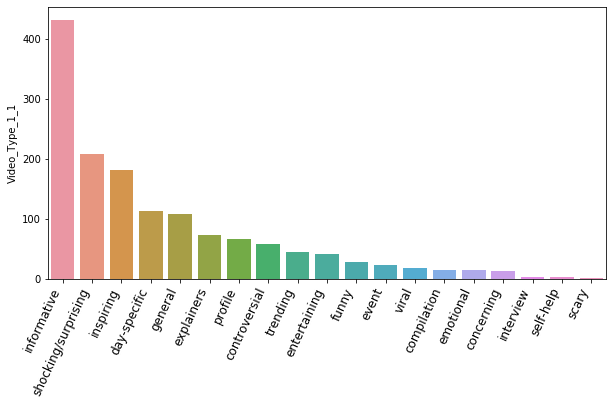

In [91]:
#check distribution for Video_Type_1_1
plt.figure(figsize = (10,5))
chart = sns.barplot(x = list(dict(data_refined['Video_Type_1_1'].value_counts()).keys()), y = data_refined['Video_Type_1_1'].value_counts())
chart.set_xticklabels(chart.get_xticklabels(), rotation = 65, horizontalalignment = 'right', fontweight = 'light', fontsize = 'large');

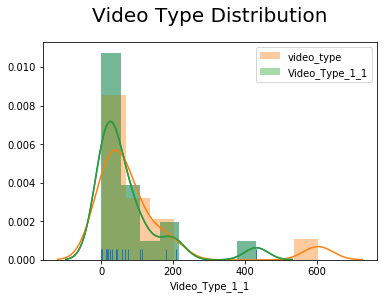

In [92]:
sns.distplot(data_refined['Video_Type_1_1'].value_counts(), rug = True);
for i in ['video_type', 'Video_Type_1_1']:
    sns.distplot(data_refined[i].value_counts(), label=i);
    plt.title('Video Type Distribution', fontdict= {'fontsize': 20}, pad = 20.5)
    plt.legend()

#### Video_Type_1_2

In [93]:
#check unique values for Video_Type_1_2
data_refined['Video_Type_1_2'].unique()

array(['no_v_category', 'profile', 'viral', 'explainers', 'controversial',
       'inspiring', 'emotional', 'scary', 'entertaining', 'informative',
       'shocking/surprising', 'trending', 'compilation', 'funny',
       'day-specific', 'event', 'concerning', 'general', 'anger'],
      dtype=object)

In [94]:
#check distribution for Video_Type_1_2
plt.figure(figsize = (10,5))
chart = sns.barplot(x = list(dict(data_refined['Video_Type_1_2'].value_counts()).keys()), y = data_refined['Video_Type_1_2'].value_counts())
chart.set_xticklabels(chart.get_xticklabels(), rotation = 65, horizontalalignment = 'right', fontweight = 'light', fontsize = 'large');

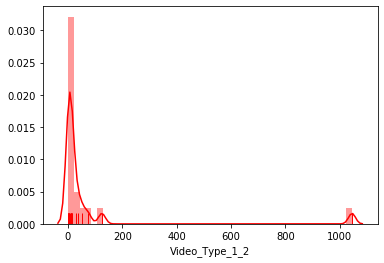

In [95]:
sns.distplot(data_refined['Video_Type_1_2'].value_counts(), rug = True, color = 'r');

* From above, we can see that more than 1000 videos have only 1 video type

In [96]:
data_refined.head(2)

post_created_time                                      permalink_url  \
0 2019-05-15 12:00:15  https://www.facebook.com/1954072204870360/post...   
1 2019-11-14 20:35:15  https://www.facebook.com/1954072204870360/post...   

                              title  \
0      'Kamali' Selected For Oscars   
1  What Is Sabarimala Temple Issue?   

                                             message primary_category_l0  \
0  9 साल की Kamali Moorthy पर बनी short film हुई ...               Filmy   
1  क्यों है सबरीमाला मंदिर में महिलाओं के प्रवेश ...            Dharohar   

  primary_category Primary_Category_1 Secondary Category  \
0           Filmy*      Entertainment             People   
1        Dharohar*  Judiciary & Crime            Culture   

              Secondary_Category_1_revisited     video_type   Video_Type_1  \
0  Award/Achievement, X-Factor, Other Sports      Inspiring      Inspiring   
1                         Judicial, Religion  Controversial  Controversial   

  voice_first_3_seconds visual_first_3_seconds  \
0        text only (to)          commoner (np)   
1   common voice (optv)          commoner (np)   

  background_music_type_first_3_seconds thumbnail thumbnail_Sentiment  \
0                              relevant  Commoner       Happy, Action   
1                              no music    Temple            Neutral    

                                                Tags  date  month  year  \
0                                            no tags    15      5  2019   
1  Sabarimala Temple, Sabarimala, Supreme Court, ...    14     11  2019   

         day  week_of_year  quarter week_of_month secondary_category_1_1  \
0  Wednesday            20        2         third      award/achievement   
1   Thursday            46        4        second               judicial   

  secondary_category_1_2 secondary_category_1_3 Video_Type_1_1 Video_Type_1_2  
0               x-factor           other sports      inspiring  no_v_category  
1               religion          no_s_category  controversial  no_v_category

### voice_first_3_seconds

In [97]:
data_refined['voice_first_3_seconds'].value_counts()

text only (to)                        980
 common voice (optv)                  168
other                                 137
 voice of famous personality (fpv)    100
voice over (vo)                        48
Crowd                                  16
Name: voice_first_3_seconds, dtype: int64

In [98]:
#data_refined['voice_first_3_seconds'].value_counts().plot(kind = 'pie', figsize = (8,8), fontsize = 14, autopct = '%.2f', label = '');

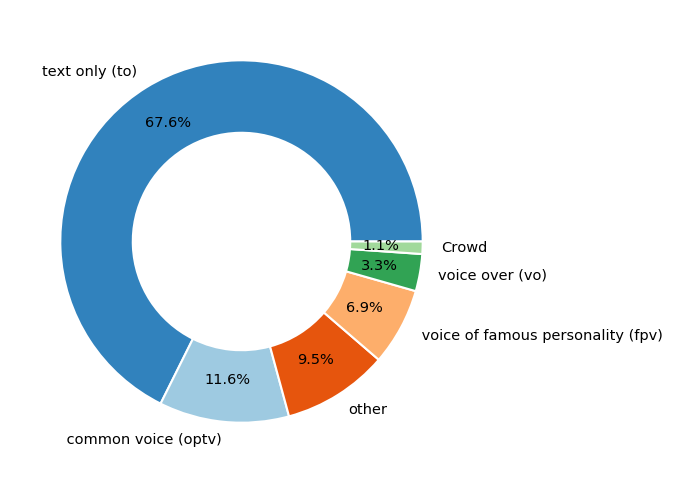

In [100]:
fig, ax = plt.subplots(dpi = 150)
size = 0.4
cmap = plt.get_cmap('tab20c')
#outer_color = cmap(np.arange(4)*4)
inner_color = cmap(np.arange(6)*2)
#ax.pie(data_refined['visual_first_3_seconds'].value_counts(), radius = 0.8, colors = outer_color, autopct = '%.1f%%',pctdistance=0.8, wedgeprops = dict(width = size, edgecolor = 'w'), textprops = dict(size = 7), labels = list(dict(data_refined['visual_first_3_seconds'].value_counts()).keys()), rotatelabels=True, labeldistance=0.1)
ax.pie(data_refined['voice_first_3_seconds'].value_counts(), radius = 1, colors = inner_color, autopct = '%.1f%%',pctdistance=0.77, wedgeprops = dict(width = size, edgecolor = 'w'), textprops = dict(size = 7), labels = list(dict(data_refined['voice_first_3_seconds'].value_counts()).keys()))

plt.show()

### visual_first_3_seconds

In [101]:
data_refined['visual_first_3_seconds'].value_counts()

commoner (np)              496
other                      398
famous personality (fp)    398
Crowd                      157
Name: visual_first_3_seconds, dtype: int64

In [102]:
#data_refined['visual_first_3_seconds'].value_counts().plot(kind = 'pie', figsize = (8,8), fontsize = 14, autopct = '%.2f', label = '');

In [103]:
fig, ax = plt.subplots(dpi = 150)
size = 0.4
cmap = plt.get_cmap('tab20c')
outer_color = cmap(np.arange(4)*4)
ax.pie(data_refined['visual_first_3_seconds'].value_counts(), radius = 1, colors = outer_color, autopct = '%.1f%%',pctdistance=0.77, wedgeprops = dict(width = size, edgecolor = 'w'), textprops = dict(size = 7), labels = list(dict(data_refined['visual_first_3_seconds'].value_counts()).keys()))
#ax.pie(data_refined['voice_first_3_seconds'].value_counts(), radius = 1, colors = inner_color, autopct = '%.1f%%',pctdistance=0.77, wedgeprops = dict(width = size, edgecolor = 'w'), textprops = dict(size = 7), labels = list(dict(data_refined['voice_first_3_seconds'].value_counts()).keys()), rotatelabels=True, labeldistance=0.1)

plt.show()

### background_music_type_first_3_seconds

In [104]:
data_refined['background_music_type_first_3_seconds'].value_counts()

relevant    884
no music    176
low         157
loud        123
neutral     109
Name: background_music_type_first_3_seconds, dtype: int64

In [105]:
from matplotlib import cm
fig, ax = plt.subplots(figsize = (5,5), dpi = 100)
explode = (0,0.1,0,0,0)
cs=cm.Set1(np.arange(5)/5.)
patches, texts, autotexts = ax.pie(data_refined['background_music_type_first_3_seconds'].value_counts(), labels = list(dict(data_refined['background_music_type_first_3_seconds'].value_counts()).keys()), colors = ['#fb9999','#66b3ff','#99ff99','#E6B0AA', '#91aa8d'],shadow = True, startangle = 0, explode = explode, autopct = '%.2f%%');
plt.setp(autotexts, size = 12)
autotexts[1].set_color('white')
plt.show()

In [106]:
#data_refined['background_music_type_first_3_seconds'].value_counts().plot(kind = 'pie', figsize = (8,8), fontsize = 14, autopct = '%.2f', label = '');

### thumbnail

In [107]:
data_refined['thumbnail'].value_counts()

Famous Personality    454
Commoner              452
Object                236
Crowd                 106
Other                  52
Nature                 32
Heritage               26
Building/ Factory      24
Animal                 23
Object, Commoner       19
Temple                 15
Commoner, Animal        4
Nature, Animal          3
Commoner, Bird          1
Nature, Commoner        1
Nature, Commoner        1
Name: thumbnail, dtype: int64

In [108]:
#create two different columns for Video_Type_1 because we can have upto 2 video types for a video.
thumbnail_1 = []
thumbnail_2 = []
for i in range(data_refined.shape[0]):
    temp_list = data_refined['thumbnail'][i].split(',')
    if len(temp_list) == 1:
        thumbnail_1.append(data_refined['thumbnail'][i].split(',')[0].strip().lower())
        thumbnail_2.append('no_thumbnail')
    else:
        thumbnail_1.append(data_refined['thumbnail'][i].split(',')[0].strip().lower())
        thumbnail_2.append(data_refined['thumbnail'][i].split(',')[1].strip().lower())
        
data_refined['thumbnail_1'] = thumbnail_1  
data_refined['thumbnail_2'] = thumbnail_2

In [109]:
data_refined['thumbnail_1'].value_counts()

commoner              457
famous personality    454
object                255
crowd                 106
other                  52
nature                 37
heritage               26
building/ factory      24
animal                 23
temple                 15
Name: thumbnail_1, dtype: int64

In [110]:
data_refined['thumbnail_1'].value_counts().plot(kind = 'bar', figsize = (13,4), fontsize = 14, label = '');

In [111]:
data_refined['thumbnail_1'].value_counts().plot(kind = 'pie', figsize = (8,8), label = '', autopct = '%0.2f', fontsize = 12);

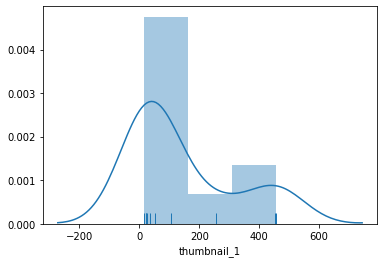

In [112]:
sns.distplot(data_refined['thumbnail_1'].value_counts(), rug = True);

In [113]:
data_refined['thumbnail_2'].value_counts()

no_thumbnail    1420
commoner          21
animal             7
bird               1
Name: thumbnail_2, dtype: int64

In [114]:
data_refined['thumbnail_2'].value_counts().plot(kind = 'bar');

In [115]:
data_refined['thumbnail_Sentiment'].unique()

array(['Happy, Action', 'Neutral ', 'Happy ', 'neutral ', 'Anger',
       'Anger, Action', 'Action', 'Proud', 'Sad', 'Happy, Proud',
       'Fear, Action', 'Fear', 'Anger, Fear', 'Happy,Sad', 'happy',
       'Action, Proud', 'Sad, Action'], dtype=object)

In [116]:
#create two different columns for Video_Type_1 because we can have upto 2 video types for a video.
thumbnail_Sentiment_1 = []
thumbnail_Sentiment_2 = []
for i in range(data_refined.shape[0]):
    temp_list = data_refined['thumbnail_Sentiment'][i].split(',')
    if len(temp_list) == 1:
        thumbnail_Sentiment_1.append(data_refined['thumbnail_Sentiment'][i].split(',')[0].strip().lower())
        thumbnail_Sentiment_2.append('no_thumbnail')
    else:
        thumbnail_Sentiment_1.append(data_refined['thumbnail_Sentiment'][i].split(',')[0].strip().lower())
        thumbnail_Sentiment_2.append(data_refined['thumbnail_Sentiment'][i].split(',')[1].strip().lower())
        
data_refined['thumbnail_Sentimentl_1'] = thumbnail_Sentiment_1  
data_refined['thumbnail_Sentiment_2'] = thumbnail_Sentiment_2

In [117]:
data_refined['thumbnail_Sentimentl_1'].value_counts()

neutral    514
happy      431
action     317
anger       71
proud       53
sad         32
fear        31
Name: thumbnail_Sentimentl_1, dtype: int64

In [118]:
data_refined['thumbnail_Sentimentl_1'].value_counts().plot(kind = 'bar', figsize = (8,4), fontsize = 14, label = '');

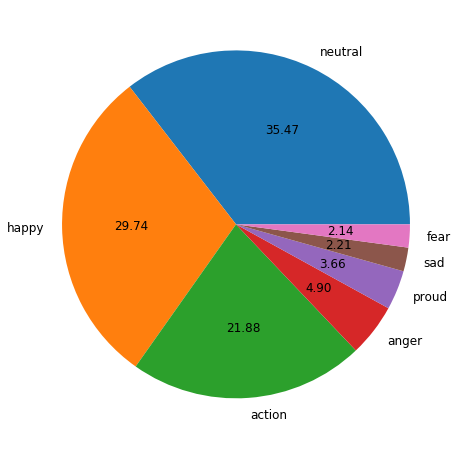

In [119]:
data_refined['thumbnail_Sentimentl_1'].value_counts().plot(kind = 'pie', figsize = (8,8), label = '', autopct = '%0.2f', fontsize = 12);

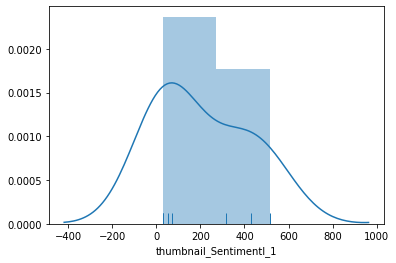

In [120]:
sns.distplot(data_refined['thumbnail_Sentimentl_1'].value_counts(), rug = True);

In [121]:
data_refined['thumbnail_Sentiment_2'].value_counts()

no_thumbnail    1360
action            72
proud             15
sad                1
fear               1
Name: thumbnail_Sentiment_2, dtype: int64

In [122]:
data_refined['thumbnail_Sentiment_2'].value_counts().plot(kind = 'bar', figsize = (8,4), fontsize = 14, label = '');

In [123]:
fig, ax = plt.subplots(dpi = 150)
size = 0.2
cmap = plt.get_cmap('tab20c')
outer_color = cmap(np.arange(10)*3)
inner_color = cmap(np.arange(4)*4)
ax.pie(data_refined['thumbnail_1'].value_counts(), radius = 1, colors = outer_color, autopct = '%.1f%%', pctdistance=0.90, wedgeprops = dict(width = size, edgecolor = 'w'), textprops = dict(size = 5.5), labels = list(dict(data_refined['thumbnail_1'].value_counts()).keys()))
ax.pie(data_refined['thumbnail_Sentimentl_1'].value_counts(), radius = 0.8, colors = inner_color, autopct = '%.1f%%',pctdistance=0.87, wedgeprops = dict(width = size, edgecolor = 'w'), textprops = dict(size = 5.5), labels = list(dict(data_refined['thumbnail_Sentimentl_1'].value_counts()).keys()), rotatelabels=True, labeldistance=0.42)
plt.title('Thumbnail & Thumbnail Sentiment')
plt.show()

### Tags

In [124]:
max([len(i.replace(' ', '').split(',')) for i in [i for i in data_refined['Tags']]])

10

In [125]:
pd.DataFrame({'Tags': [i for i in data_refined['Tags']], 'Length': [len(i.replace(' ', '').split(',')) for i in [i for i in data_refined['Tags']]]}).sort_values(by = 'Length', ascending=False)

Tags  Length
318   Test Cricket & First-Class Cricket, Cricket, P...      10
223   Animal Rescue, Chennai, India, Pigeon Forge, T...      10
393   London, United Kingdom, Dehra Dun, India, Utta...      10
383   China, Mahabalipuram, Tamil Nadu, India, PM Mo...      10
272   Karachi, Pakistan, Rawalpindi, Pakistan, Pakis...      10
153   Bears, Bilaspur, Chhattīsgarh, India, Hinduism...      10
197   Travel Safety, Indore, India, Bhopal, Madhya P...      10
169   Social Media, Indore, India, Ranjit Singh, Dan...       9
162   Marine Drive Mumbai, Mumbai, Maharashtra, Mumb...       9
166   Tractors, Infrastructure, Bhopal, Madhya Prade...       9
133   Aam Admi Party, Delhi, India, New Delhi, Sport...       9
457   Bollywood, Mumbai, Maharashtra, Bigg Boss, Sal...       9
374   Youth Soccer, Football (Association Rules, Soc...       9
355   Bhubaneswar, India, Birdwatching, Funny Animal...       9
246   Health Care Industry, Uttar Pradesh, Senior & ...       9
467   Houston, Texas, United States, Sparsh Shah, Ho...       9
696   Chennai, India, Environmental Policy, Water Cr...       9
244   Uttar Pradesh, Allahabad, India, Ayodhya Case,...       9
263   Islamabad, Pakistan, Terrorism, Sindh, Pakista...       9
763   Islamabad,Pakistan, Pakistan, posters, balochi...       9
158   Marine Drive Mumbai, Cricket, Mumbai, Maharash...       9
352   Visual Impairment & Blindness, Mumbai, Maharas...       9
283   Srinagar, Jammu and Kashmir, Jammu and Kashmir...       9
949   Internet of things, soical media, Jallandhar, ...       9
282   Srinagar, Jammu and Kashmir, Jammu and Kashmir...       9
271   Climate Change & Global Warming, Bangladesh, K...       9
273   New Delhi railway station, National Capital Re...       9
391   Cancer, Pune, Maharashtra, Wall painting, Kart...       9
275   London, United Kingdom, Cricket, Sikhism, Air ...       9
277   Ladakh, India, Jammu and Kashmir, Union Territ...       9
398   Amritsar, Punjab, Punjab (region), Sikhism, Gu...       9
479   Social Media, Bathinda, India, Traffic Constab...       9
396   Dhaka, Bangladesh, Durga Puja, Kolkata, Durga ...       9
486   Houston, Texas, Narendra Modi, PM Modi, Howdy ...       9
102   Tamil Nadu, Coimbatore, Tamil Nadu, Chennai, I...       9
316   Amritsar, Punjab, Indira Gandhi Assassination,...       9
201   Maharashtra, Pune, Maharashtra, Mahadev Jadhav...       9
200   Humane society, Animal Rescue, Animal Welfare,...       9
199   Rajasthan, Jaipur, Rajasthan, Pink City of Ind...       9
217   Uttar Pradesh, Drones, Scientology, Agricultur...       9
556   Ludhiana, Punjab, India, MLA, Simarjit Singh B...       9
544   Bhubaneswar, India, Buddhism, Odisha, Dhaula S...       9
541   Bollywood, Mumbai, Maharashtra, Jameel Shah Sh...       9
220   Srinagar, Jammu and Kashmir, Jammu and Kashmir...       9
328   Srinagar, Jammu and Kashmir, Test Cricket & Fi...       9
329   Aam Admi Party, Delhi, India, Delhi Odd Even R...       9
226   Amritsar, Punjab, Sikhism, Lahore, Pakistan, G...       9
333   Haryana, Hisar, Haryana, Indian National Congr...       9
649   Agra, Uttar Pradesh, Sheesh Mahal, Agra fort, ...       9
128   Social Media, Bollywood, Bhopal, Madhya Prades...       9
288   Haryana, Boxing, Vijender Singh, Boxer Vijende...       8
292   Diwali, Jewelry, Grand Plaza Shopping, Dhanter...       8
281   Test Cricket & First-Class Cricket, Cricket, K...       8
315   Haryana Vidhan Sabha Elections, Maharashtra Vi...       8
314   Terrorism, Jammu and Kashmir, Pakistan, Indian...       8
297   BJP, Shiv Sena, Maharashtra Elections, Pankaja...       8
299   Diwali, New York Stock Exchange, Mahurat Tradi...       8
304   Test Cricket & First-Class Cricket, Cricket, I...       8
305   Haryana Elections, Maharashtra Elections, Vidh...       8
293   Diwali, Casinos, Poker, Gambling, Playing Card...       8
312   Diwali, Diwali Festival, Handmade diyas, Handm...       8
287   Terrorism, Jammu and Kashmir, Kulgam, Pulwama,...       8
291   Maharashtra, 

In [126]:
data_refined['Tags'][223]

'Animal Rescue, Chennai, India, Pigeon Forge, Tennessee, Marina beach, pigeon feeding center, feeding pigeons at marina beach, pigeons at marina beach, marina beach pigeons'

In [127]:
pd.DataFrame({'Tags': [i for i in data_refined['Tags']], 'Length': [len(i.replace(' ', '').split(',')) for i in [i for i in data_refined['Tags']]]}).sort_values(by = 'Length', ascending=False)['Length'].value_counts()

1     698
8     226
6     149
5     118
7     114
4      63
9      43
3      25
10      7
2       6
Name: Length, dtype: int64

In [135]:
pd.DataFrame({'Tags': [i for i in data_refined['Tags']], 'Length': [len(i.replace(' ', '').split(',')) for i in [i for i in data_refined['Tags']]]}).sort_values(by = 'Length', ascending=False)['Length'].value_counts().plot.bar(title = 'Tags Distribution');

In [129]:
data_refined[data_refined['Tags'] == 'no tags'].shape[0] + data_refined[data_refined['Tags'] == 'not editable'].shape[0]

694

In [130]:
data_refined[data_refined['Tags'] == 'not editable'].shape[0]

176

In [131]:
print(f'{694-176} number of videos has no tags')

518 number of videos has no tags


In [136]:
data_refined

post_created_time                                      permalink_url  \
0    2019-05-15 12:00:15  https://www.facebook.com/1954072204870360/post...   
1    2019-11-14 20:35:15  https://www.facebook.com/1954072204870360/post...   
2    2020-01-09 14:17:15  https://www.facebook.com/1954072204870360/post...   
3    2020-01-09 18:00:15  https://www.facebook.com/1954072204870360/post...   
4    2020-01-28 12:50:15  https://www.facebook.com/1954072204870360/post...   
5    2020-01-08 17:00:15  https://www.facebook.com/1954072204870360/post...   
6    2020-01-11 09:00:15  https://www.facebook.com/1954072204870360/post...   
7    2020-01-08 15:00:15  https://www.facebook.com/1954072204870360/post...   
8    2020-01-08 20:30:15  https://www.facebook.com/1954072204870360/post...   
9    2020-01-07 18:30:15  https://www.facebook.com/1954072204870360/post...   
10   2020-01-08 12:00:15  https://www.facebook.com/1954072204870360/post...   
11   2020-01-10 17:00:15  https://www.facebook.com/1954072204870360/post...   
12   2020-01-09 12:00:15  https://www.facebook.com/1954072204870360/post...   
13   2020-01-10 15:00:15  https://www.facebook.com/1954072204870360/post...   
14   2020-01-07 20:30:15  https://www.facebook.com/1954072204870360/post...   
15   2020-01-06 20:30:15  https://www.facebook.com/NEWJplus/videos/83431...   
16   2020-01-07 15:00:15  https://www.facebook.com/1954072204870360/post...   
17   2020-01-06 16:30:15  https://www.facebook.com/1954072204870360/post...   
18   2020-01-11 15:00:15  https://www.facebook.com/1954072204870360/post...   
19   2020-01-07 12:00:15  https://www.facebook.com/1954072204870360/post...   
20   2020-01-06 15:07:15  https://www.facebook.com/1954072204870360/post...   
21   2020-01-07 09:00:15  https://www.facebook.com/1954072204870360/post...   
22   2020-01-08 09:00:15  https://www.facebook.com/1954072204870360/post...   
23   2020-01-03 16:35:15  https://www.facebook.com/1954072204870360/post...   
24   2020-01-04 09:05:15  https://www.facebook.com/1954072204870360/post...   
25   2020-01-03 12:05:15  https://www.facebook.com/1954072204870360/post...   
26   2020-01-03 20:35:15  https://www.facebook.com/1954072204870360/post...   
27   2020-01-02 20:30:15  https://www.facebook.com/1954072204870360/post...   
28   2020-01-02 17:27:15  https://www.facebook.com/1954072204870360/post...   
29   2020-01-04 15:00:15  https://www.facebook.com/1954072204870360/post...   
30   2020-01-03 09:00:15  https://www.facebook.com/1954072204870360/post...   
31   2020-01-02 14:09:15  https://www.facebook.com/1954072204870360/post...   
32   2020-01-06 09:05:15  https://www.facebook.com/1954072204870360/post...   
33   2020-01-05 15:00:15  https://www.facebook.com/1954072204870360/post...   
34   2020-01-05 09:05:15  https://www.facebook.com/1954072204870360/post...   
35   2020-01-04 12:05:15  https://www.facebook.com/1954072204870360/post...   
36   2020-01-04 18:00:15  https://www.facebook.com/1954072204870360/post...   
37   2019-12-30 17:23:15  https://www.facebook.com/1954072204870360/post...   
38   2019-12-30 13:00:15  https://www.facebook.com/1954072204870360/post...   
39   2019-12-31 12:00:15  https://www.facebook.com/1954072204870360/post...   
40   2019-12-30 20:30:15  https://www.facebook.com/1954072204870360/post...   
41   2019-12-27 17:00:15  https://www.facebook.com/1954072204870360/post...   
42   2019-12-27 15:19:15  https://www.facebook.com/1954072204870360/post...   
43   2019-12-28 20:30:15  https://www.facebook.com/1954072204870360/post...   
44   2019-12-29 09:00:15  https://www.facebook.com/1954072204870360/post...   
45   2019-12-26 17:00:15  https://www.facebook.com/1954072204870360/post...   
46   2019-12-29 12:00:15  https://www.facebook.com/1954072204870360/post...   
47   2020-01-10 20:30:15  https://www.facebook.com/1954072204870360/post...   
48   2020-01-01 09:00:15  https://www.facebook.com/1954072204870360/post...   
49   2019-12-26 14:14:15  https://www.facebook.com/195407

In [138]:
data_refined.to_csv('golden_data_refined.csv')